# Travel Agency Clustering

* The success and longevity of any business are closely tied to effective marketing. Marketers work to build a company's brand, connect with consumers, increase sales, and drive revenue. They achieve this by attracting new clients, articulating the value proposition, and engaging with customers to better understand their needs.

* The crucial focus for marketers is to understand their customers and their needs. This is achieved through market segmentation, which involves dividing a broad client base into smaller, more defined groups based on shared characteristics. These characteristics can include common needs, interests, lifestyles, geographic locations, or demographic profiles.

* This case aims at analyzing data gathered by a travel agency on the search behaviors of its clients over the course of two years (Jan 2013 to Dec 2014). 




### Data Import and Preprocessing

In [732]:
import pandas as pd
pd.set_option('display.max_columns',None) # to see all columns in the dataframe
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt        #For plotting graphs
%matplotlib inline                    
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
import gc
import datetime

In [733]:
# Download our dataset
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/travel.csv"
travel = pd.read_csv(file_name)

In [734]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83


In [735]:
travel.shape

(100000, 25)

In [736]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 100000 non-null  int64  
 1   date_time                  100000 non-null  object 
 2   site_name                  100000 non-null  int64  
 3   posa_continent             100000 non-null  int64  
 4   user_location_country      100000 non-null  int64  
 5   user_location_region       100000 non-null  int64  
 6   user_location_city         100000 non-null  int64  
 7   orig_destination_distance  63915 non-null   float64
 8   user_id                    100000 non-null  int64  
 9   is_mobile                  100000 non-null  int64  
 10  is_package                 100000 non-null  int64  
 11  channel                    100000 non-null  int64  
 12  srch_ci                    99878 non-null   object 
 13  srch_co                    998

In [737]:
# Changing the string to  datatime type using pandas
travel['srch_co'] = pd.to_datetime(travel['srch_co'])
travel['srch_ci'] = pd.to_datetime(travel['srch_ci'])
travel['date_time'] = pd.to_datetime(travel['date_time'])

# Change the timestamp of 'date_time' (2014-11-03 16:02:28) to simply "2014-11-03"
travel['date'] = pd.to_datetime(travel['date_time'].apply(lambda x: x.date()))

travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2014-11-03
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,2013-03-13
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,2014-10-13
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2013-11-05
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83,2014-06-10


In [738]:
# check missing values for each column 
travel.isnull().sum().sort_values(ascending=False)

orig_destination_distance    36085
srch_co                        122
srch_ci                        122
srch_adults_cnt                  0
hotel_cluster                    0
hotel_market                     0
hotel_country                    0
hotel_continent                  0
cnt                              0
is_booking                       0
srch_destination_type_id         0
srch_destination_id              0
srch_rm_cnt                      0
srch_children_cnt                0
Unnamed: 0                       0
date_time                        0
channel                          0
is_package                       0
is_mobile                        0
user_id                          0
user_location_city               0
user_location_region             0
user_location_country            0
posa_continent                   0
site_name                        0
date                             0
dtype: int64

In [739]:
# check out the rows with missing values
travel[travel['srch_ci'].isnull()]


,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date
753,26946496,2014-06-22 07:47:06,2,3,54,58,31207,NaN,898564,1,0,1,NaT,NaT,2,0,1,15121,3,0,2,6,180,1737,38,2014-06-22
1360,20864197,2013-04-13 17:21:20,17,1,133,31,29905,NaN,356874,0,0,0,NaT,NaT,2,1,1,21576,6,0,2,6,208,1798,53,2013-04-13
1539,8869536,2014-12-28 19:16:12,2,3,66,363,31138,1526.8518,938404,0,1,0,NaT,NaT,0,0,1,8277,1,0,1,2,50,412,9,2014-12-28
2386,36091030,2013-07-12 13:26:26,34,3,66,337,25077,NaN,236196,0,0,9,NaT,NaT,2,0,1,8267,1,0,1,2,50,675,56,2013-07-12
3074,4470999,2013-06-01 11:02:19,2,3,66,174,24103,2907.8256,750027,1,0,9,NaT,NaT,2,1,1,11372,1,0,1,4,121,199,90,2013-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95473,8829646,2013-07-15 13:19:51,11,3,205,354,48951,354.1388,798973,0,0,2,NaT,NaT,2,0,1,24919,6,0,1,2,50,676,21,2013-07-15
95754,1854683,2013-12-25 15:50:22,2,3,66,311,9621,7230.5971,1018996,1,0,9,NaT,NaT,2,0,1,22402,1,0,1,3,104,64,78,2013-12-25
96798,5575336,2013-06-27 14:02:30,8,4,77,824,15015,74.2136,5821,0,0,9,NaT,NaT,2,0,1,42175,3,0,1,0,63,959,44,2013-06-27
98515,37339267,2013-06-20 15:25:04,2,3,66,174,19362,36.9813,42089,0,0,0,NaT,NaT,2,0,1,1565,3,0,1,2,50,363,99,2013-06-20


* We can see that both values from checkin and checkout dates are missing for the same entries:

In [741]:
#We can see that both values from checkin and checkout dates are missing for the same entries:
# drop corresponding row
travel.dropna(subset=['srch_ci', 'srch_co'],inplace=True)

In [742]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='mean')
var=['orig_destination_distance']
travel[var]=SI.fit_transform(travel[var])

In [743]:
travel.isnull().sum()

Unnamed: 0                   0
date_time                    0
site_name                    0
posa_continent               0
user_location_country        0
user_location_region         0
user_location_city           0
orig_destination_distance    0
user_id                      0
is_mobile                    0
is_package                   0
channel                      0
srch_ci                      0
srch_co                      0
srch_adults_cnt              0
srch_children_cnt            0
srch_rm_cnt                  0
srch_destination_id          0
srch_destination_type_id     0
is_booking                   0
cnt                          0
hotel_continent              0
hotel_country                0
hotel_market                 0
hotel_cluster                0
date                         0
dtype: int64

In [744]:
# To check any duplicate rows
travel.duplicated().sum()

0

### Basic Statistical Details and Visualization

In [746]:
travel.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,99878.0,18826212.823224,1012.0,9451006.25,18812663.0,28253090.5,37670090.0,10861315.496185
date_time,99878,2014-04-03 13:48:16.885209856,2013-01-07 00:33:47,2013-10-25 15:04:38,2014-05-30 13:03:46,2014-09-18 09:28:20.249999872,2014-12-31 23:47:14,NaN
site_name,99878.0,9.835579,2.0,2.0,2.0,15.0,53.0,11.995919
posa_continent,99878.0,2.678167,0.0,3.0,3.0,3.0,4.0,0.748946
user_location_country,99878.0,86.00034,0.0,66.0,66.0,70.0,239.0,59.288689
user_location_region,99878.0,308.643585,0.0,174.0,314.0,385.0,1025.0,208.665169
user_location_city,99878.0,27674.785298,0.0,12941.75,27655.0,42328.0,56507.0,16768.3857
orig_destination_distance,99878.0,1960.772432,0.0056,746.2519,1960.772432,1960.772432,11965.3761,1781.185379
user_id,99878.0,605360.459821,14.0,298752.5,602822.5,915542.25,1198783.0,351602.96299
is_mobile,99878.0,0.133653,0.0,0.0,0.0,0.0,1.0,0.340281


<Axes: ylabel='orig_destination_distance'>

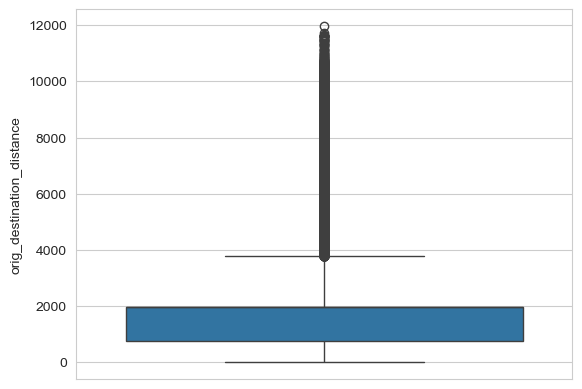

In [747]:
# use boxplot to check outliers in orig_destination_distance
sns.boxplot(travel['orig_destination_distance'])

In [748]:
# skew describes asymmasymmetry of data distribution/outliers that affect or are affected by the skewness in a dataset/. (moderate: -2 to+2)
print(travel.orig_destination_distance.skew())

# “Kurtosis is the degree of peakedness of a distribution” /significant presense of outliers/. (moderate: 3 to 6)
print(travel.orig_destination_distance.kurtosis())

2.0079657758337883
5.0445496621267445


In [749]:
# Create our Corelation Matrix
corr = travel.corr()
corr

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date
Unnamed: 0,1.000000,-0.003294,0.005010,-0.000386,0.001042,0.000678,-0.002353,-0.002603,0.010293,-0.006287,-0.000853,-0.000173,-0.002740,-0.002731,-0.003183,0.000300,-0.003890,0.001057,-0.003523,-0.002743,-0.004456,0.006341,0.003102,0.004247,-0.005836,-0.003297
date_time,-0.003294,1.000000,-0.023798,-0.010496,-0.021363,-0.012512,-0.004332,-0.002243,-0.017522,0.023934,-0.002435,-0.060938,0.952221,0.951117,0.013007,-0.075639,-0.004751,0.011654,-0.040606,-0.033135,-0.089246,-0.008411,-0.005645,0.003360,0.000387,0.999999
site_name,0.005010,-0.023798,1.000000,-0.637862,0.159349,0.130921,-0.013388,0.016644,0.030438,-0.005321,0.048914,-0.028009,-0.001569,-0.001054,-0.013315,-0.031953,0.016395,0.034946,-0.006865,-0.013395,0.022222,0.201843,0.263014,-0.068449,-0.026715,-0.023899
posa_continent,-0.000386,-0.010496,-0.637862,1.000000,0.179765,-0.034957,0.039064,0.028591,-0.015225,0.016231,-0.093540,0.089775,-0.026851,-0.027669,0.012348,0.034558,-0.033871,-0.015540,0.037238,0.013323,-0.018851,-0.333729,-0.156607,0.049237,0.018321,-0.010398
user_location_country,0.001042,-0.021363,0.159349,0.179765,1.000000,0.058321,0.122370,0.035194,-0.021013,0.003792,-0.025237,0.110004,-0.020851,-0.020539,0.042632,0.037112,0.000541,0.013409,0.028871,0.001259,0.003593,-0.063661,0.097575,0.015494,-0.011875,-0.021347
user_location_region,0.000678,-0.012512,0.130921,-0.034957,0.058321,1.000000,0.132404,0.075556,0.002238,0.016997,0.040606,-0.001754,0.009723,0.010378,0.005466,0.014128,0.000405,0.022359,0.001461,0.000244,-0.007761,0.043023,-0.050351,0.040303,0.005026,-0.012551
user_location_city,-0.002353,-0.004332,-0.013388,0.039064,0.122370,0.132404,1.000000,0.011050,-0.008132,-0.003608,0.013113,0.023399,-0.004184,-0.003894,0.006654,0.002634,-0.000740,0.000835,-0.004510,-0.002629,-0.002142,0.007648,-0.002079,0.008527,0.000135,-0.004316
orig_destination_distance,-0.002603,-0.002243,0.016644,0.028591,0.035194,0.075556,0.011050,1.000000,0.013077,-0.047773,0.033405,-0.000388,0.064255,0.066550,-0.018959,-0.049364,-0.009271,-0.028373,-0.034352,-0.027260,0.007144,0.306189,0.193312,-0.066835,0.002778,-0.002257
user_id,0.010293,-0.017522,0.030438,-0.015225,-0.021013,0.002238,-0.008132,0.013077,1.000000,-0.011290,-0.018918,-0.003421,-0.014944,-0.014900,-0.007322,0.003005,-0.001810,0.002720,0.007121,0.001627,0.001133,0.002215,0.008583,-0.002193,0.003003,-0.017531
is_mobile,-0.006287,0.023934,-0.005321,0.016231,0.003792,0.016997,-0.003608,-0.047773,-0.011290,1.000000,0.047234,-0.030621,0.024625,0.024727,0.016689,0.018402,-0.022452,-0.007077,-0.016117,-0.028551,0.008269,-0.024200,-0.029590,0.007540,0.012331,0.023873


Text(0.5, 1.0, 'Heat_map of correlation matrix')

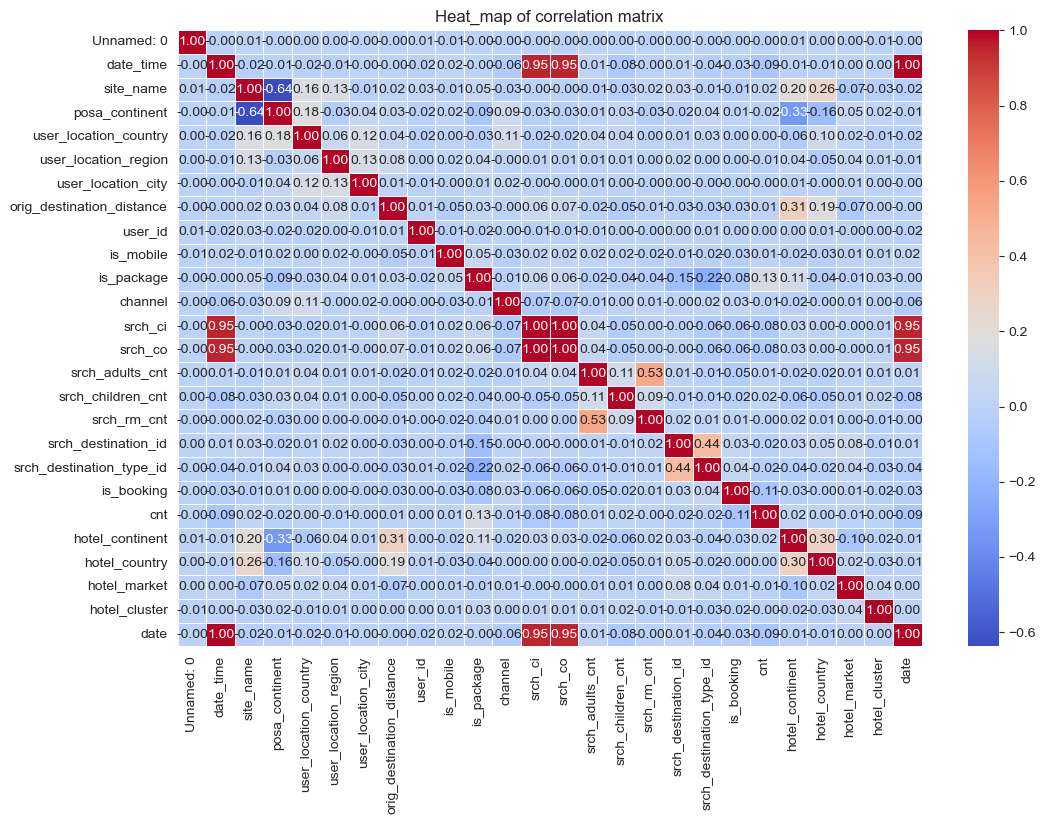

In [750]:
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heat_map of correlation matrix')

array([[<Axes: title={'center': 'channel'}>,
        <Axes: title={'center': 'is_booking'}>,
        <Axes: title={'center': 'is_mobile'}>],
       [<Axes: title={'center': 'orig_destination_distance'}>,
        <Axes: title={'center': 'srch_rm_cnt'}>,
        <Axes: title={'center': 'srch_adults_cnt'}>],
       [<Axes: title={'center': 'srch_children_cnt'}>, <Axes: >,
        <Axes: >]], dtype=object)

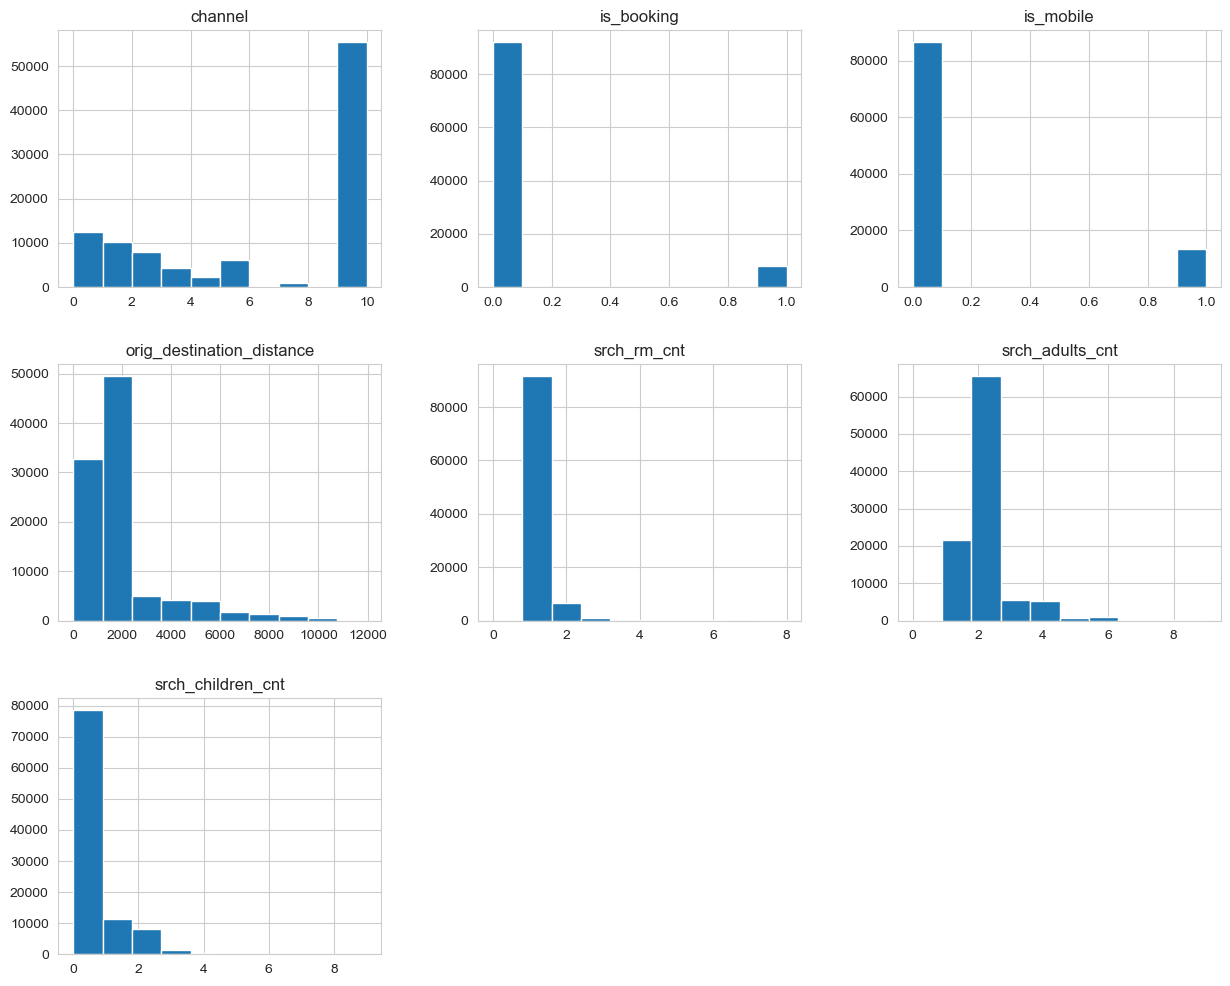

In [751]:
# Plot some of the data

travel[['channel', 'is_booking', 'is_mobile', 'orig_destination_distance', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']].hist(figsize=(15,12))

**From the graphs above, take notice of the following points:**
* Most bookings are made through channel 10.
* The majority of searches do not lead to bookings.
* Connecting from a mobile device accounts for the majority of bookings (83%).
* Most searchers only want one room, usually are two adults and no children.

In [753]:
# booking_attempt_count per user
booking_attempt_count_per_user=travel.groupby(['user_id',]).agg(count=('is_booking','size')).reset_index()
booking_attempt_count_per_user


,user_id,count
0,14,1
1,38,1
2,40,1
3,156,2
4,160,1
...,...,...
88755,1198722,1
88756,1198742,1
88757,1198748,1
88758,1198776,1


<Axes: >

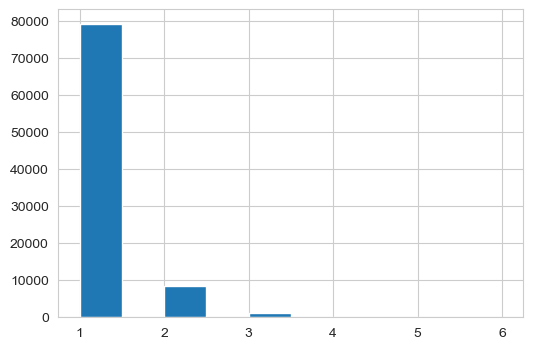

In [754]:
booking_attempt_count_per_user['count'].hist(figsize=(6,4))

* Most users make only one booking attempt, fewer make two attempts, and the fewest make three attempt

In [756]:
# Consilidate by user IDs
travel.groupby('user_id')['is_booking'].agg(['count']).head()

,count
user_id,
14,1
38,1
40,1
156,2
160,1


In [757]:
# Merge this with our original dataframe to add our 'count' column
# default ‘inner’, merging on user_id
travel = travel.merge(travel.groupby('user_id')['is_booking'].agg(['count']).reset_index())
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,count
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.115100,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2014-11-03,2
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.473700,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,2013-03-13,1
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.272000,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,2014-10-13,1
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.602100,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2013-11-05,2
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,1960.772432,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83,2014-06-10,1


In [758]:
# booking_made_by_user
booking_made_by_user=travel[travel.is_booking==1].groupby(['user_id',]).agg(count=('is_booking','size')).reset_index()
booking_made_by_user

,user_id,count
0,656,1
1,905,1
2,992,1
3,1119,1
4,1181,1
...,...,...
7867,1197883,1
7868,1197944,1
7869,1198109,1
7870,1198324,1


<Axes: >

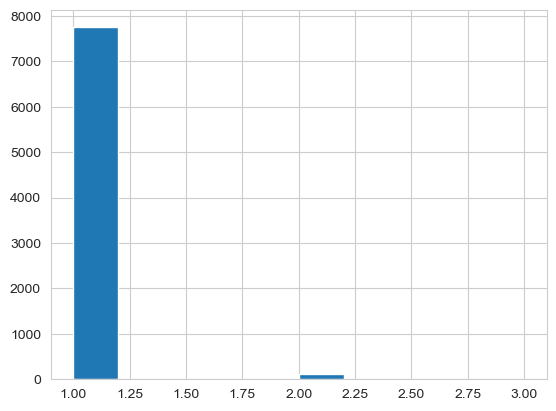

In [759]:
booking_made_by_user['count'].hist()

* Most users made only one booking, while only a few made two

In [761]:
booking_made_by_user_hotel_cluster=travel[travel.is_booking==1].groupby(['user_id','hotel_cluster']).agg(count=('is_booking','size')).reset_index()
booking_made_by_user_hotel_cluster

,user_id,hotel_cluster,count
0,656,48,1
1,905,77,1
2,992,61,1
3,1119,99,1
4,1181,71,1
...,...,...,...
7978,1197883,58,1
7979,1197944,62,1
7980,1198109,48,1
7981,1198324,64,1


<Axes: >

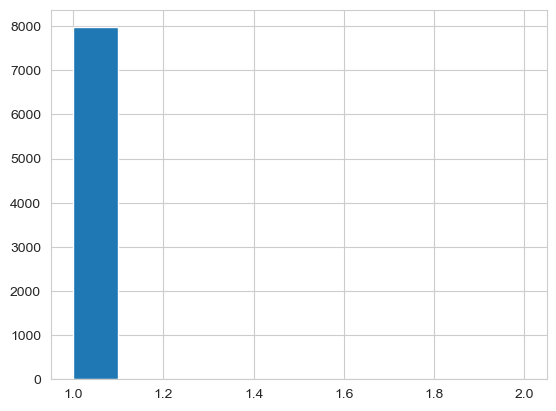

In [762]:
booking_made_by_user_hotel_cluster['count'].hist()

* No customer made more than one booking with the same hotel_cluster

### Some Logic Checks on Data


In [765]:
#number of guests (number of travelers) need to be > 0
# We use crosstab to group the counts
pd.crosstab(travel['srch_adults_cnt'], travel['srch_children_cnt'])

srch_children_cnt,0,1,2,3,4,5,6,7,8,9
srch_adults_cnt,,,,,,,,,,
0,173,2,3,2,0,0,0,0,0,0
1,18742,2136,523,117,11,1,9,1,2,0
2,50637,7082,6528,972,208,14,7,1,0,0
3,3645,1131,469,130,27,5,2,2,0,2
4,3932,690,494,77,83,9,4,0,0,0
5,535,131,41,20,6,4,2,0,0,0
6,669,73,53,28,18,13,7,0,0,0
7,99,20,5,8,6,3,0,0,0,0
8,183,12,13,2,6,1,3,2,2,1


* 173 entries with no guests at all so we remove these.

In [767]:
travel = travel.drop(travel[(travel['srch_adults_cnt']==0) & (travel['srch_children_cnt']==0)].index)
# pd.crosstab(travel['srch_adults_cnt'], travel['srch_children_cnt'])

In [768]:
# Check-out date need to be later than check-in date;
# Check-in date need to be later than booking date
print(travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']])
print('\n')
travel[travel['srch_ci'] < travel['date']][['srch_ci', 'date']]

         srch_co    srch_ci
36872 2015-05-09 2015-08-31
44673 2013-05-27 2013-08-20




,srch_ci,date
5803,2014-01-05,2014-01-07
12299,2014-10-13,2014-10-14
18995,2014-02-11,2014-10-09
21757,2014-03-10,2014-09-15
22548,2014-09-12,2014-12-02
25029,2014-08-02,2014-08-23
30770,2013-09-20,2013-09-21
30897,2014-07-08,2014-07-29
35742,2014-12-01,2014-12-02
40068,2014-04-11,2014-10-26


*  we delete the data that has checkin dates that are later than checkout dates and booking dates that are later than checkin dates 
* there is only a few of them, so it will not affect further modeling.

In [770]:
travel=travel.drop(travel[travel['srch_co'] < travel['srch_ci']][['srch_co', 'srch_ci']].index)
travel=travel.drop(travel[travel['srch_ci'] < travel['date']][['srch_ci', 'date']].index)

In [771]:
# Analysis of booking channels
travel.groupby('channel').agg(booking_rate=('is_booking','mean')).reset_index()

,channel,booking_rate
0,0,0.072474
1,1,0.069599
2,2,0.060691
3,3,0.060565
4,4,0.120548
5,5,0.094595
6,6,0.068323
7,7,0.043371
8,8,0.051852
9,9,0.085426


### Feature Engineering

In [773]:
#Let's create some new columns that can provide some useful info (not always necesary but help when doing clusters/decision trees)
def duration(row):
    #Gives the duration of trip by taking the row as an input and finding the time (in days) beween checkin and checkout
    delta = (row['srch_co'] - row['srch_ci'])/np.timedelta64(1, 'D')
    if delta <= 0:
        return np.nan
    else:
        return delta

def days_in_advance(row):
    '''Gives the days the trip was booked in advance'''
    delta = (row['srch_ci'] - row['date'])/np.timedelta64(1, 'D')
    if delta < 0:
        return np.nan
    else:
        return delta

# Duration is finds the length of stay by substracting the checkout day from the checkin day
travel['duration'] = travel.apply(duration, axis=1)

# Shows how long in advance the booking was made. Done by substracting the checkin date from the booking date
travel['days_in_advance'] = travel.apply(days_in_advance, axis=1)

* The duration of stay (duration): gives the duration of trip and finding the time (in days) between checkin and checkout, 
  is counted by substracting the checkout day from the checkin day.
* The days in advance the booking was made to checkin date (days_in_advance): gives the days the trip was booked in advance,
  is done by substracting the checkin date from the booking date.

In [775]:
travel.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,date,count,duration,days_in_advance
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.115100,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68,2014-11-03,2,4.0,42.0
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.473700,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37,2013-03-13,1,1.0,0.0
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.272000,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22,2014-10-13,1,7.0,172.0
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.602100,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42,2013-11-05,2,1.0,2.0
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,1960.772432,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83,2014-06-10,1,5.0,54.0


In [776]:
# lets start clustering

### Dimensionality Reduction
* Selecting few features which are very important: duration, days_in_advance, orig_destination_distance, is_mobile, is_package,
  srch_adults_cnt, srch_children_cnt, srch_rm_cnt.
 

In [778]:
features_to_explore = ['duration', 'days_in_advance', 'orig_destination_distance', 'is_mobile',
            'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt']

In [779]:
# Let's create two new dataframes with our new data called city_data and another where we do a groupby on city_data on user_location_city
city_data = travel.dropna(axis=0)[features_to_explore + ['user_location_city']]
city_groups = city_data.groupby('user_location_city').mean().reset_index().dropna(axis=0)

In [780]:
city_groups.head()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
0,0,2.0000,78.50,2315.836250,0.0000,0.25,1.7500,0.0,1.0
1,1,1.0000,2.50,1960.772432,0.0000,0.00,2.0000,1.0,1.0
2,3,4.5625,92.25,3550.017500,0.0625,0.25,1.9375,0.5,1.0
3,7,14.0000,58.00,5994.864000,0.0000,1.00,2.0000,0.0,1.0
4,8,2.0000,58.00,1960.772432,0.0000,0.00,3.0000,2.0,1.0


In [781]:
city_groups.shape

(10749, 9)

In [782]:
city_data.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,4.0,42.0,456.115100,0,1,2,0,1,36643
1,1.0,0.0,232.473700,0,0,2,0,1,38749
2,7.0,172.0,4468.272000,0,1,2,0,1,48562
3,1.0,2.0,171.602100,0,0,2,0,1,52752
4,5.0,54.0,1960.772432,0,0,2,1,1,50644


In [783]:
city_groups.describe()

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
count,10749.00000,10749.000000,10749.000000,10749.000000,10749.000000,10749.000000,10749.000000,10749.000000,10749.000000
mean,28415.78277,3.543342,59.685150,1894.569021,0.135160,0.267286,2.046545,0.342633,1.129764
std,16366.65742,2.792514,54.708141,1014.139519,0.262304,0.349435,0.724879,0.571723,0.408228
min,0.00000,1.000000,0.000000,0.907100,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14100.00000,2.000000,22.000000,1744.964180,0.000000,0.000000,1.833333,0.000000,1.000000
50%,28521.00000,3.000000,47.000000,1960.772432,0.000000,0.105263,2.000000,0.000000,1.000000
75%,42695.00000,4.111111,78.214286,1960.772432,0.166667,0.454545,2.017544,0.500000,1.076923
max,56507.00000,151.000000,420.000000,11428.188600,1.000000,1.000000,9.000000,8.000000,8.000000


### Standardizing Data

In [785]:
city_groups_std = city_groups.copy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
city_groups_std = scaler.fit_transform(city_groups[features_to_explore])

In [786]:
city_groups_std = pd.DataFrame(city_groups_std,columns= features_to_explore)
city_groups_std['user_location_city'] = city_groups['user_location_city']
city_groups_std.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city
0,-0.552697,0.343929,0.415413,-0.515304,-0.049470,-0.409115,-0.599327,-0.317885,0
1,-0.910814,-1.045325,0.065283,-0.515304,-0.764944,-0.064214,1.149852,-0.317885,1
2,0.364978,0.595275,1.632444,-0.277020,-0.049470,-0.150439,0.275262,-0.317885,3
3,3.744706,-0.030804,4.043315,-0.515304,2.096952,-0.064214,-0.599327,-0.317885,7
4,-0.552697,-0.030804,0.065283,-0.515304,-0.764944,1.315391,2.899032,-0.317885,8


### Elbow method
In the K-means algorithm, we need to pre-determine the number of clusters.
The question is what is the best number of clusters to split for a particular dataset? 
The Elbow method is a way to help us choose the number of suitable clusters based on the visualization graph 
by looking at the attenuation of the strain function and selecting the elbow point.

Text(0.5, 1.0, 'Elbow Method For Optimal k')

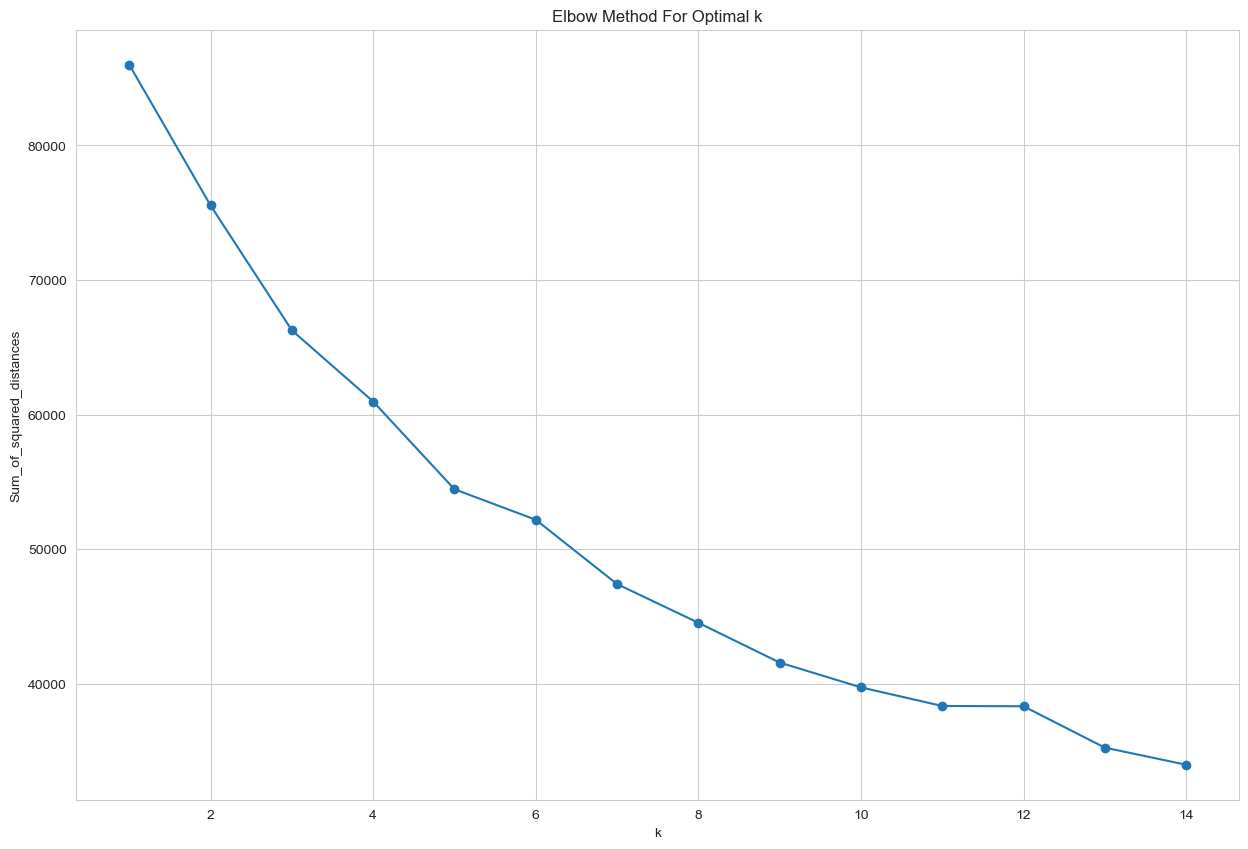

In [788]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, max_iter=300, random_state=None)
    km = km.fit(city_groups_std[features_to_explore])
#Get sum of square distances by applying km.inertia_ 
    Sum_of_squared_distances.append(km.inertia_)
#Plot Results
plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, marker='o')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

In [789]:
from kneed import KneeLocator

kneedle = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

print("The optimal number of clusters (elbow point) is:" ,elbow_point)

The optimal number of clusters (elbow point) is: 7


**elbow_point is 6**

### K-MEANS

In [792]:
km = KMeans(n_clusters=6, max_iter=300, random_state=None)
km.fit(city_groups_std[features_to_explore])
labels = km.labels_
km.cluster_centers_.shape

(6, 8)

* 6 clusters with 8 features

### Silhouette Coeff

In [795]:
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(city_groups_std[features_to_explore])
    label = kmeans.labels_
    sil_coeff = silhouette_score(city_groups_std[features_to_explore], label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3621608628468567
For n_clusters=3, The Silhouette Coefficient is 0.24113615322127746
For n_clusters=4, The Silhouette Coefficient is 0.2542598521681086
For n_clusters=5, The Silhouette Coefficient is 0.2727906665979362
For n_clusters=6, The Silhouette Coefficient is 0.2779459732157651
For n_clusters=7, The Silhouette Coefficient is 0.28118532467539253
For n_clusters=8, The Silhouette Coefficient is 0.1550326916773782
For n_clusters=9, The Silhouette Coefficient is 0.2473237756995598
For n_clusters=10, The Silhouette Coefficient is 0.1673938248426127


* For n_clusters=6, The Silhouette Coefficient is 0.27772534949103467 comparitively high, so we stick with k=6

In [797]:
#prediction
from sklearn import cluster
km = cluster.KMeans(n_clusters=6, max_iter=300, random_state=None)
city_groups_std['cluster'] = km.fit_predict(city_groups_std[features_to_explore])

### Principal Component Analysis (PCA)
* Principal component analysis, or PCA, is a dimensionality reduction method.
* The idea of PCA is reducing the number of variables of a data set, while preserving as much information as possible.


In [799]:
from sklearn import svm
import glob
import os
from PIL import Image
from sklearn.decomposition import PCA

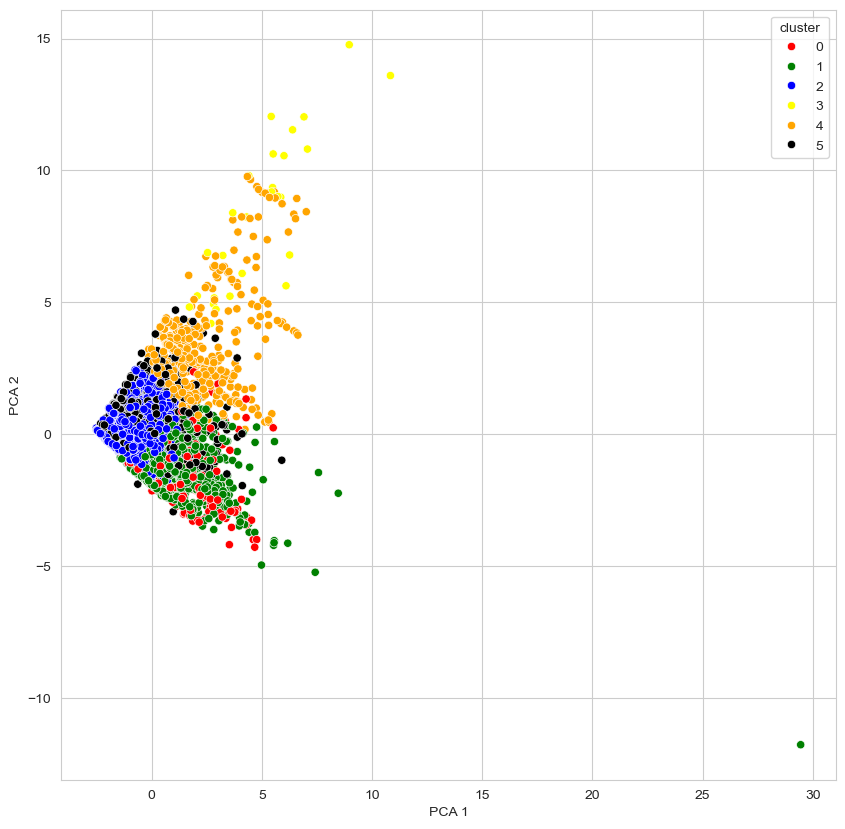

In [800]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(city_groups_std[features_to_explore])
pca_df = pd.DataFrame(principal_comp,columns=['PCA 1','PCA 2'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="PCA 1", y="PCA 2", hue = "cluster", data = pca_df,palette =['red','green','blue','yellow','orange','black'])

### Profile and Inspect our 6 clusters

In [802]:
city_groups_std.head()

,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,user_location_city,cluster
0,-0.552697,0.343929,0.415413,-0.515304,-0.049470,-0.409115,-0.599327,-0.317885,0,4
1,-0.910814,-1.045325,0.065283,-0.515304,-0.764944,-0.064214,1.149852,-0.317885,1,1
2,0.364978,0.595275,1.632444,-0.277020,-0.049470,-0.150439,0.275262,-0.317885,3,3
3,3.744706,-0.030804,4.043315,-0.515304,2.096952,-0.064214,-0.599327,-0.317885,7,3
4,-0.552697,-0.030804,0.065283,-0.515304,-0.764944,1.315391,2.899032,-0.317885,8,1


In [803]:
city_groups_std['cluster'].unique()

array([4, 1, 3, 0, 2, 5])

<Axes: xlabel='cluster'>

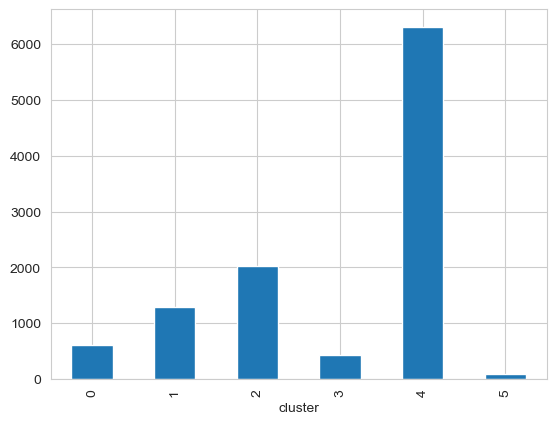

In [804]:
# Plot our Cluster Counts
city_groups_std.groupby('cluster')['user_location_city'].count().plot(kind='bar')

In [805]:
# We will merge the two dataframes based on a common column user_location_city
customer_seg =city_groups.merge(city_groups_std[['user_location_city', 'cluster']]).groupby('cluster').mean() # for every column
customer_seg

,user_location_city,duration,days_in_advance,orig_destination_distance,is_mobile,is_package,srch_adults_cnt,srch_children_cnt,srch_rm_cnt
cluster,,,,,,,,,
0,29858.014754,3.223615,65.109872,1753.703140,0.136829,0.205738,3.630452,0.267797,1.786705
1,28208.407465,3.393700,60.894168,1654.434117,0.137469,0.156772,1.970445,1.500808,1.082258
2,28152.679386,5.456988,88.327268,1879.041702,0.144141,0.823925,1.943674,0.175594,1.046845
3,29075.065421,4.528269,93.994903,5536.829901,0.088684,0.180326,1.983104,0.269495,1.075360
4,28351.688540,2.932194,47.225631,1719.814187,0.135402,0.125430,1.894155,0.170280,1.059695
5,28824.591837,3.134354,72.530612,1585.552610,0.096939,0.150510,5.392007,0.465136,4.119898


### CONCLUSION

We have 6 client groups characterized by the following:

* Group 1 (cluster=0):This cluster has a moderate duration and a significant average distance traveled, with a relatively high advance booking time. This group tends to book more packages but relies less on mobile devices.

* Group 2 (cluster=1):This cluster features shorter trips with a very high average travel distance, suggesting international travel. Bookings are made with a shorter lead time, and there's a lower percentage of package bookings.



* Group 3 (cluster=2):This cluster shows short trips with moderate distances. The percentage of mobile bookings is relatively high, but package bookings are low.

* Group 4 (cluster=3):This cluster represents travelers who tend to book more rooms (possibly larger groups) with a moderate distance and advance booking time.

* Group 5 (cluster=4):This group shows family-oriented bookings with higher average children count and moderate distance.

* Group 6 (cluster=5):This cluster has a higher percentage of package bookings and moderate travel distance, but fewer children in the bookings.